# Setup


In [1]:
!pip uninstall fastai -y --quiet
!pip install fastai --quiet
!pip install chess --quiet

     |████████████████████████████████| 197 kB 31.7 MB/s 
     |████████████████████████████████| 60 kB 7.9 MB/s 
     |████████████████████████████████| 148 kB 11.9 MB/s 


In [2]:
from fastai.vision.all import *
import numpy as np
import seaborn as sns
import pandas as pd
import chess
from matplotlib import pyplot as plt
set_seed(42)
sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = Path('/content/drive/MyDrive/UC3M/CUARTO/TFG')

Mounted at /content/drive


# Data

In [4]:
def filter_boards(path):
    return [ image for image in get_image_files(path) if 'empty' in image.__str__() or int(image.__str__().split('_')[3]) <= 3]

# 12 Label Classifier

## Data

In [5]:
dblock12 = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=filter_boards,
                   splitter=GrandparentSplitter(),
                   get_y=parent_label,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms(size=100, min_scale=0.75)
                  )
dls12 = dblock12.dataloaders(path/'data')
dblock12.summary(path/'data')

Setting-up type transforms pipelines
Found 3200 items
2 datasets of sizes 2368,832
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /content/drive/MyDrive/UC3M/CUARTO/TFG/data/train/white_bishop/white_bishop_1_A1.png
    applying PILBase.create gives
      PILImage mode=RGB size=181x181
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /content/drive/MyDrive/UC3M/CUARTO/TFG/data/train/white_bishop/white_bishop_1_A1.png
    applying parent_label gives
      white_bishop
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=181x181, TensorCategory(7))


Found 3200 items
2 datasets of sizes 2368,832
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- 

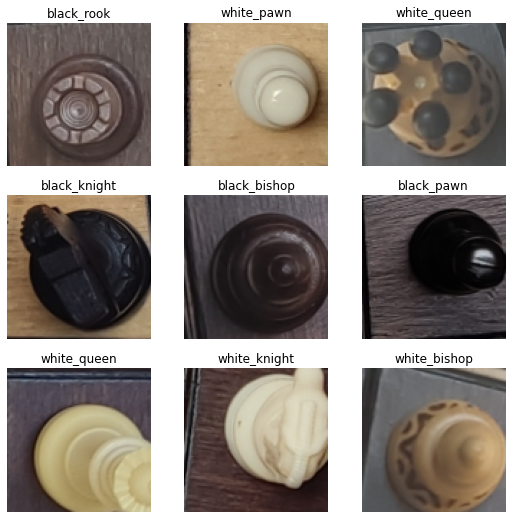

In [6]:
dls12.show_batch(nrows=3, ncols=3)

In [7]:
epochs = 20
freeze_epochs = 20
metrics = [
        error_rate
]
callbacks = [
        ShowGraphCallback(),
        EarlyStoppingCallback(monitor='valid_loss', patience=10),
        SaveModelCallback(monitor='valid_loss', fname=path/'models'/'model12')
]
learn12 = cnn_learner(dls12, resnet18, metrics=metrics, cbs=callbacks)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## Training

Better model found at epoch 0 with valid_loss value: 2.397308826446533.


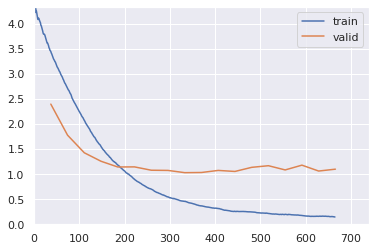

Better model found at epoch 1 with valid_loss value: 1.7778353691101074.
Better model found at epoch 2 with valid_loss value: 1.4265978336334229.
Better model found at epoch 3 with valid_loss value: 1.2574697732925415.
Better model found at epoch 4 with valid_loss value: 1.1432353258132935.
Better model found at epoch 6 with valid_loss value: 1.07871413230896.
Better model found at epoch 7 with valid_loss value: 1.0747535228729248.
Better model found at epoch 8 with valid_loss value: 1.0300073623657227.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 1.1898349523544312.


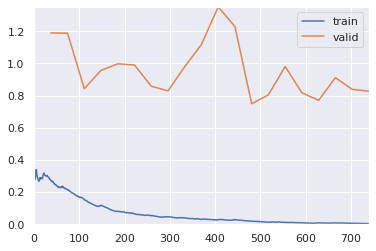

Better model found at epoch 1 with valid_loss value: 1.1876970529556274.
Better model found at epoch 2 with valid_loss value: 0.8431987762451172.
Better model found at epoch 7 with valid_loss value: 0.8293952941894531.
Better model found at epoch 12 with valid_loss value: 0.7492763996124268.


In [ ]:
learn12.fine_tune(epochs, freeze_epochs=freeze_epochs)

## Evaluation

In [ ]:
learn12.load(path/'models'/'model12')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


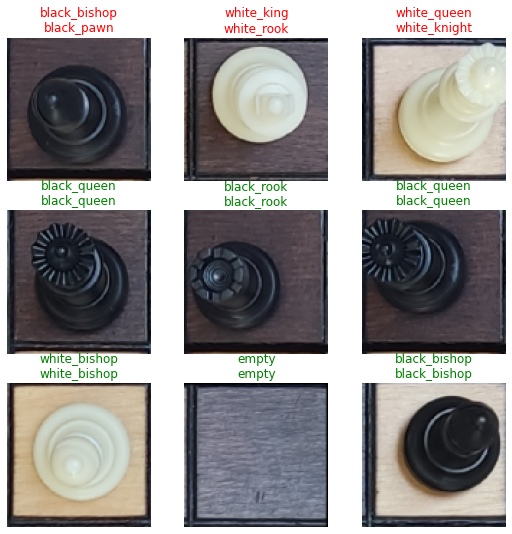

In [ ]:
learn12.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn12)
interp.print_classification_report()

              precision    recall  f1-score   support

black_bishop       1.00      0.19      0.32        64
  black_king       0.73      1.00      0.84        64
black_knight       0.98      0.94      0.96        64
  black_pawn       0.70      1.00      0.83        64
 black_queen       0.94      1.00      0.97        64
  black_rook       0.92      0.92      0.92        64
       empty       1.00      1.00      1.00        64
white_bishop       1.00      0.70      0.83        64
  white_king       0.95      0.58      0.72        64
white_knight       0.72      0.88      0.79        64
  white_pawn       0.81      1.00      0.90        64
 white_queen       0.95      0.31      0.47        64
  white_rook       0.52      0.98      0.68        64

    accuracy                           0.81       832
   macro avg       0.86      0.81      0.79       832
weighted avg       0.86      0.81      0.79       832



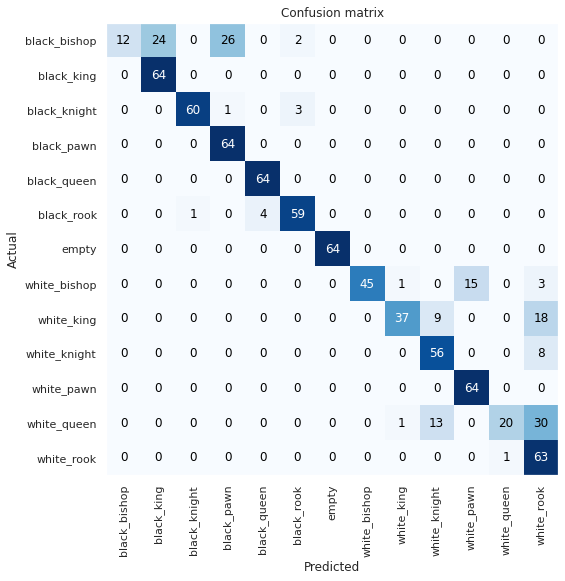

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8))

# 6 Class Classifier

## Data

In [ ]:
def half_labels(x): return x.parent.name[6:].split('\.')[0] if not 'empty' in x.__str__() else 'empty'

In [ ]:
dblock6 = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=filter_boards,
                   splitter=GrandparentSplitter(),
                   get_y=half_labels,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms(size=100, min_scale=0.75)
                )
dls6 = dblock6.dataloaders(path/'data')

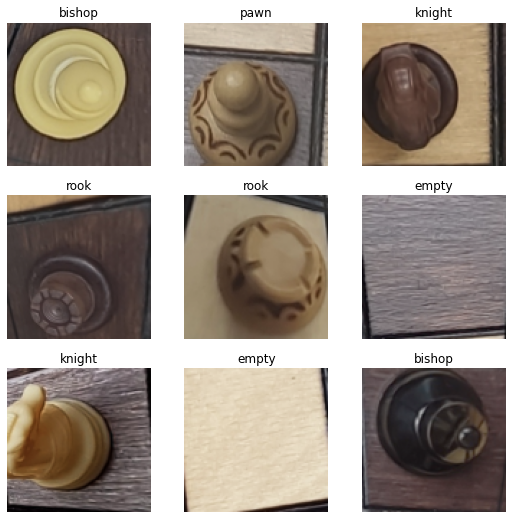

In [ ]:
dls6.show_batch(nrows=3, ncols=3)

In [ ]:
epochs = 20
freeze_epochs = 20
metrics = [
        error_rate,
]
callbacks = [
        ShowGraphCallback(),
        EarlyStoppingCallback(monitor='valid_loss', patience=10),
        SaveModelCallback(monitor='valid_loss', fname=path/'models'/'model6')
]
learn6 = cnn_learner(dls6, resnet18, metrics=metrics, cbs=callbacks)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


## Training

Better model found at epoch 0 with valid_loss value: 1.6386196613311768.


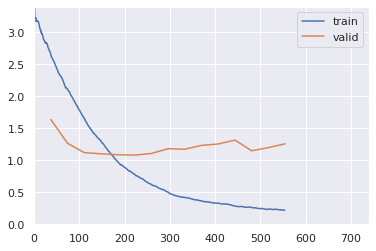

Better model found at epoch 1 with valid_loss value: 1.2656307220458984.
Better model found at epoch 2 with valid_loss value: 1.1207249164581299.
Better model found at epoch 3 with valid_loss value: 1.10206937789917.
Better model found at epoch 4 with valid_loss value: 1.0876210927963257.
Better model found at epoch 5 with valid_loss value: 1.081633448600769.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 1.075048804283142.


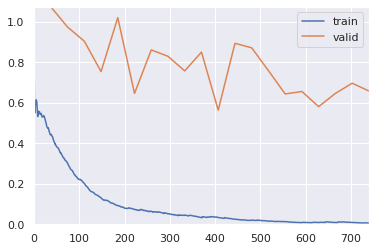

Better model found at epoch 1 with valid_loss value: 0.9752720594406128.
Better model found at epoch 2 with valid_loss value: 0.9054079651832581.
Better model found at epoch 3 with valid_loss value: 0.754984438419342.
Better model found at epoch 5 with valid_loss value: 0.6470834016799927.
Better model found at epoch 10 with valid_loss value: 0.5641356706619263.


In [ ]:
learn6.fine_tune(epochs, freeze_epochs=freeze_epochs)

## Evaluation

In [ ]:
learn6.load(path/'models'/'model6')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


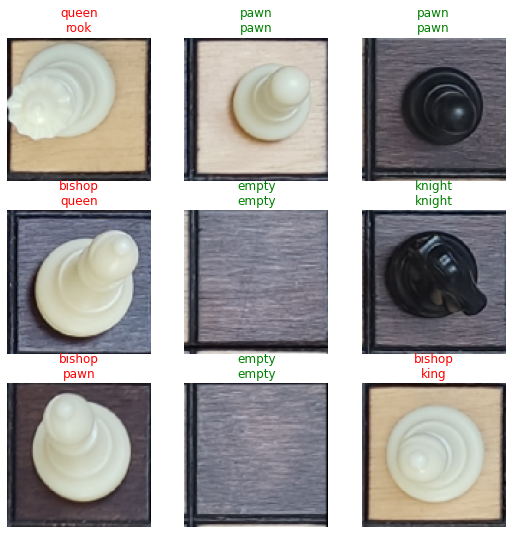

In [ ]:
learn6.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn6)
interp.print_classification_report()

              precision    recall  f1-score   support

      bishop       1.00      0.40      0.57       128
       empty       1.00      1.00      1.00        64
        king       0.78      0.88      0.83       128
      knight       0.90      0.97      0.93       128
        pawn       0.79      1.00      0.88       128
       queen       0.94      0.78      0.85       128
        rook       0.72      0.95      0.82       128

    accuracy                           0.84       832
   macro avg       0.88      0.85      0.84       832
weighted avg       0.87      0.84      0.83       832



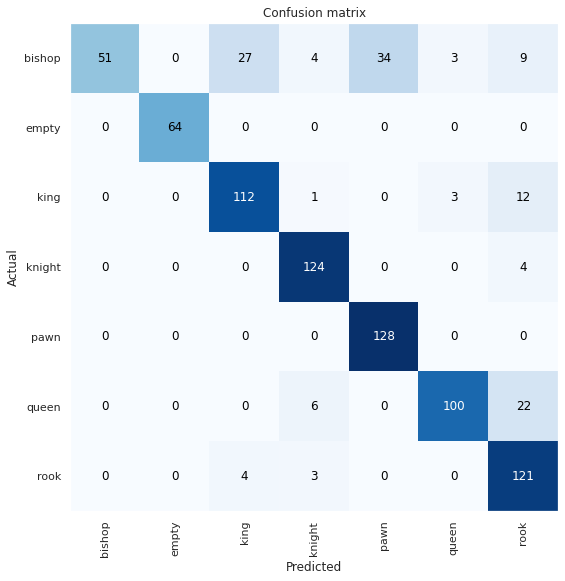

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8))

# One vs All

In [8]:
def is_label(x, label): return label if x.parent.name.__contains__(label) else 'other'

## Bishop

### Data

In [9]:
def is_bishop(x): return is_label(x, 'bishop')

In [10]:
dblock_bishop = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=filter_boards,
                   splitter=GrandparentSplitter(),
                   get_y=is_bishop,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms(size=100, min_scale=0.75))
dls_bishop = dblock_bishop.dataloaders(path/'data')

In [11]:
epochs = 20
freeze_epochs = 20
metrics = [
        error_rate,
]
callbacks = [
        ShowGraphCallback(),
        EarlyStoppingCallback(monitor='valid_loss', patience=10),
        SaveModelCallback(monitor='valid_loss', fname=path/'models'/'model_bishop')
]
learn_bishop = cnn_learner(dls_bishop, resnet18, metrics=metrics, cbs=callbacks)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


### Training

Better model found at epoch 0 with valid_loss value: 0.5878071188926697.


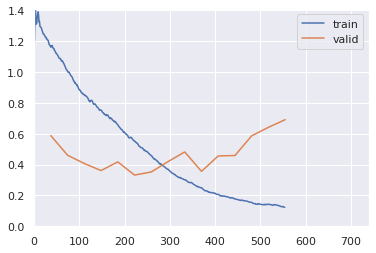

Better model found at epoch 1 with valid_loss value: 0.4608178734779358.
Better model found at epoch 2 with valid_loss value: 0.4071134030818939.
Better model found at epoch 3 with valid_loss value: 0.3613417446613312.
Better model found at epoch 5 with valid_loss value: 0.33212658762931824.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.31738710403442383.


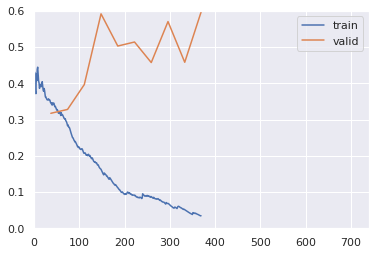

No improvement since epoch 0: early stopping


In [ ]:
learn_bishop.fine_tune(epochs, freeze_epochs=freeze_epochs)

### Evaluation

In [ ]:
learn_bishop.load(path/'models'/'model_bishop')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


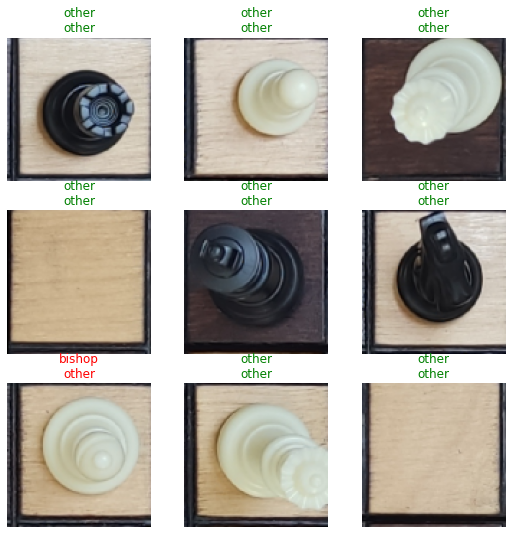

In [ ]:
learn_bishop.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_bishop)
interp.print_classification_report()

              precision    recall  f1-score   support

      bishop       0.63      0.28      0.39       128
       other       0.88      0.97      0.92       704

    accuracy                           0.86       832
   macro avg       0.76      0.63      0.66       832
weighted avg       0.84      0.86      0.84       832



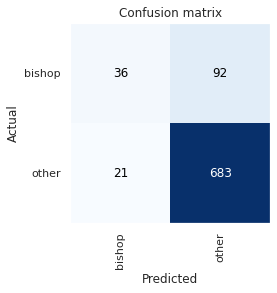

In [ ]:
interp.plot_confusion_matrix()

## King

### Data

In [12]:
def is_king(x):   return is_label(x, 'king')

In [13]:
dblock_king = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=filter_boards,
                   splitter=GrandparentSplitter(),
                   get_y=is_king,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms(size=100, min_scale=0.75))
dls_king = dblock_king.dataloaders(path/'data')

In [14]:
epochs = 20
freeze_epochs = 20
metrics = [
        error_rate,
]
callbacks = [
        ShowGraphCallback(),
        EarlyStoppingCallback(monitor='valid_loss', patience=10),
        SaveModelCallback(monitor='valid_loss', fname=path/'models'/'model_king')
]
learn_king = cnn_learner(dls_king, resnet18, metrics=metrics, cbs=callbacks)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


### Training

Better model found at epoch 0 with valid_loss value: 0.7572392821311951.


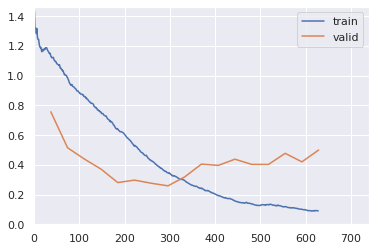

Better model found at epoch 1 with valid_loss value: 0.5153292417526245.
Better model found at epoch 2 with valid_loss value: 0.4397057294845581.
Better model found at epoch 3 with valid_loss value: 0.3714781403541565.
Better model found at epoch 4 with valid_loss value: 0.280780553817749.
Better model found at epoch 6 with valid_loss value: 0.2763349413871765.
Better model found at epoch 7 with valid_loss value: 0.25897154211997986.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.27888041734695435.


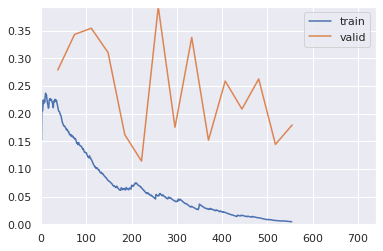

Better model found at epoch 4 with valid_loss value: 0.16200685501098633.
Better model found at epoch 5 with valid_loss value: 0.11425932496786118.
No improvement since epoch 5: early stopping


In [ ]:
learn_king.fine_tune(epochs, freeze_epochs=freeze_epochs)

### Evaluation

In [ ]:
learn_king.load(path/'models'/'model_king')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


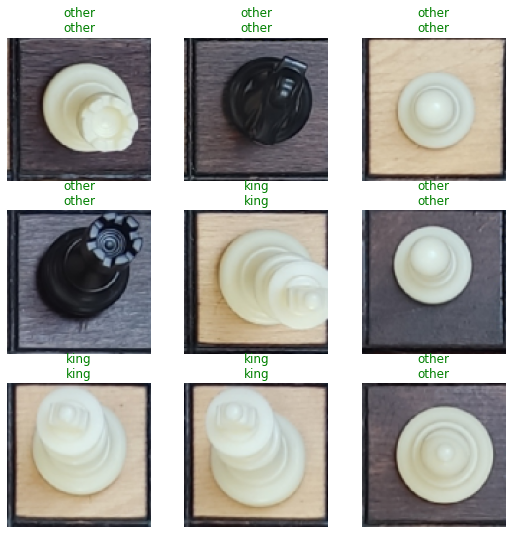

In [ ]:
learn_king.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_king)
interp.print_classification_report()

              precision    recall  f1-score   support

        king       0.97      0.77      0.86       128
       other       0.96      1.00      0.98       704

    accuracy                           0.96       832
   macro avg       0.96      0.88      0.92       832
weighted avg       0.96      0.96      0.96       832



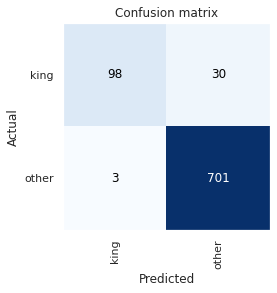

In [ ]:
interp.plot_confusion_matrix()

## Knight

### Data

In [15]:
def is_knight(x): return is_label(x, 'knight')

In [16]:
dblock_knight = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=filter_boards,
                   splitter=GrandparentSplitter(),
                   get_y=is_knight,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms(size=100, min_scale=0.75))
dls_knight = dblock_knight.dataloaders(path/'data')

In [17]:
epochs = 20
freeze_epochs = 20
metrics = [
        error_rate,
]
callbacks = [
        ShowGraphCallback(),
        EarlyStoppingCallback(monitor='valid_loss', patience=10),
        SaveModelCallback(monitor='valid_loss', fname=path/'models'/'model_knight')
]
learn_knight = cnn_learner(dls_knight, resnet18, metrics=metrics, cbs=callbacks)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


### Training

Better model found at epoch 0 with valid_loss value: 0.6589161157608032.


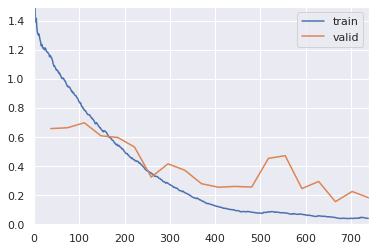

Better model found at epoch 3 with valid_loss value: 0.6092414855957031.
Better model found at epoch 4 with valid_loss value: 0.5979165434837341.
Better model found at epoch 5 with valid_loss value: 0.5320883393287659.
Better model found at epoch 6 with valid_loss value: 0.325101375579834.
Better model found at epoch 9 with valid_loss value: 0.27968764305114746.
Better model found at epoch 10 with valid_loss value: 0.25553643703460693.
Better model found at epoch 15 with valid_loss value: 0.24626949429512024.
Better model found at epoch 17 with valid_loss value: 0.15591366589069366.


Better model found at epoch 0 with valid_loss value: 0.11186015605926514.


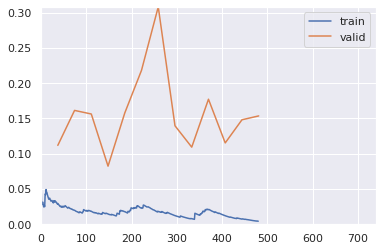

Better model found at epoch 3 with valid_loss value: 0.08239872008562088.
No improvement since epoch 3: early stopping


In [ ]:
learn_knight.fine_tune(epochs, freeze_epochs=freeze_epochs)

### Evaluation

In [ ]:
learn_knight.load(path/'models'/'model_knight')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


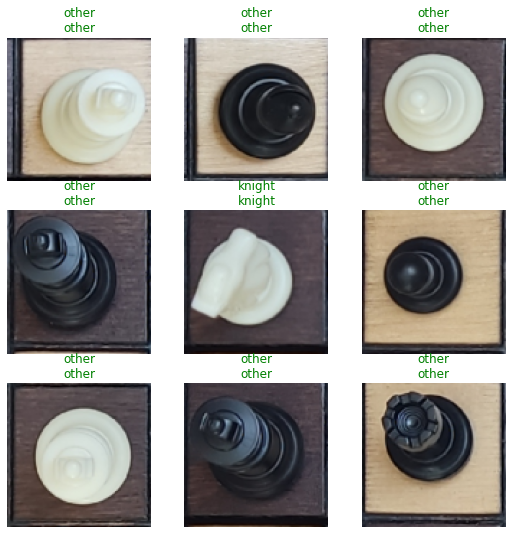

In [ ]:
learn_knight.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_knight)
interp.print_classification_report()

              precision    recall  f1-score   support

      knight       0.92      0.92      0.92       128
       other       0.99      0.99      0.99       704

    accuracy                           0.98       832
   macro avg       0.95      0.95      0.95       832
weighted avg       0.98      0.98      0.98       832



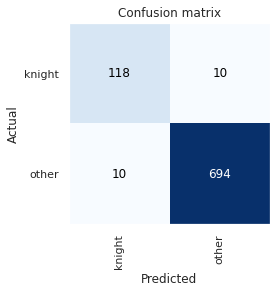

In [ ]:
interp.plot_confusion_matrix()

## Empty

### Data

In [18]:
def is_empty(x):   return is_label(x, 'empty')

In [19]:
dblock_empty = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=filter_boards,
                   splitter=GrandparentSplitter(),
                   get_y=is_empty,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms(size=100, min_scale=0.75))
dls_empty = dblock_empty.dataloaders(path/'data')

In [20]:
epochs = 20
freeze_epochs = 20
metrics = [
        error_rate,
]
callbacks = [
        ShowGraphCallback(),
        EarlyStoppingCallback(monitor='valid_loss', patience=10),
        SaveModelCallback(monitor='valid_loss', fname=path/'models'/'model_empty')
]
learn_empty = cnn_learner(dls_empty, resnet18, metrics=metrics, cbs=callbacks)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


### Training

Better model found at epoch 0 with valid_loss value: 1.3276063203811646.


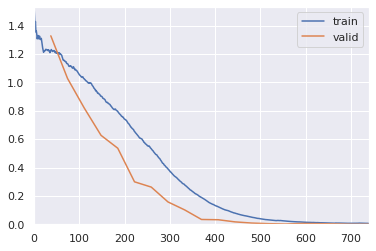

Better model found at epoch 1 with valid_loss value: 1.027016520500183.
Better model found at epoch 2 with valid_loss value: 0.8184833526611328.
Better model found at epoch 3 with valid_loss value: 0.6266244053840637.
Better model found at epoch 4 with valid_loss value: 0.5357589721679688.
Better model found at epoch 5 with valid_loss value: 0.2992718815803528.
Better model found at epoch 6 with valid_loss value: 0.2621167302131653.
Better model found at epoch 7 with valid_loss value: 0.1574402153491974.
Better model found at epoch 8 with valid_loss value: 0.10117726027965546.
Better model found at epoch 9 with valid_loss value: 0.03402316942811012.
Better model found at epoch 10 with valid_loss value: 0.0322011299431324.
Better model found at epoch 11 with valid_loss value: 0.017084462568163872.
Better model found at epoch 12 with valid_loss value: 0.00872634258121252.
Better model found at epoch 13 with valid_loss value: 0.0044681597501039505.
Better model found at epoch 14 with vali

Better model found at epoch 0 with valid_loss value: 0.0002711693523451686.


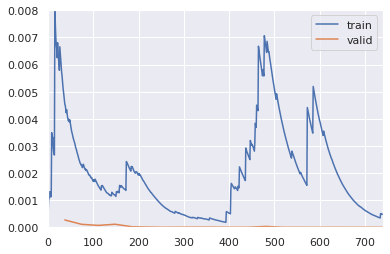

Better model found at epoch 1 with valid_loss value: 0.00011015727068297565.
Better model found at epoch 2 with valid_loss value: 7.047682447591797e-05.
Better model found at epoch 4 with valid_loss value: 2.1233023289823905e-05.
Better model found at epoch 5 with valid_loss value: 9.490020602243021e-06.
Better model found at epoch 6 with valid_loss value: 2.305197085661348e-06.
Better model found at epoch 10 with valid_loss value: 1.6276552514682407e-06.
Better model found at epoch 14 with valid_loss value: 6.256977371776884e-07.
Better model found at epoch 15 with valid_loss value: 6.037782895873534e-07.
Better model found at epoch 17 with valid_loss value: 5.074970772511733e-07.


In [ ]:
learn_empty.fine_tune(epochs, freeze_epochs=freeze_epochs)

### Evaluation

In [ ]:
learn_empty.load(path/'models'/'model_empty')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


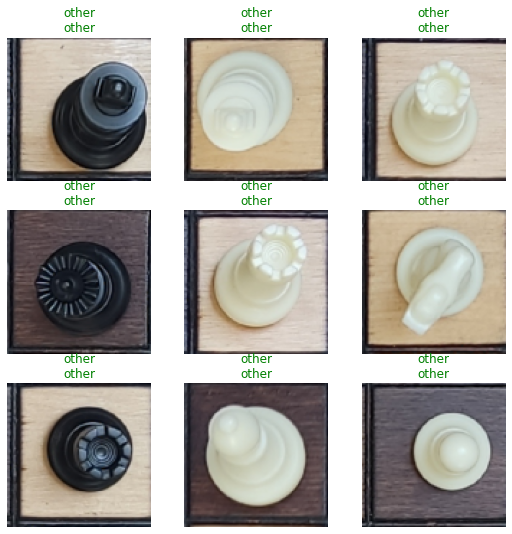

In [ ]:
learn_empty.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_empty)
interp.print_classification_report()

              precision    recall  f1-score   support

       empty       1.00      1.00      1.00        64
       other       1.00      1.00      1.00       768

    accuracy                           1.00       832
   macro avg       1.00      1.00      1.00       832
weighted avg       1.00      1.00      1.00       832



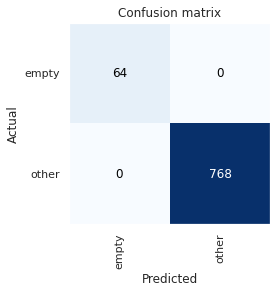

In [ ]:
interp.plot_confusion_matrix()

## Pawn

### Data

In [21]:
def is_pawn(x):   return is_label(x, 'pawn')

In [22]:
dblock_pawn = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=filter_boards,
                   splitter=GrandparentSplitter(),
                   get_y=is_pawn,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms(size=100, min_scale=0.75))
dls_pawn = dblock_pawn.dataloaders(path/'data')

In [23]:
epochs = 20
freeze_epochs = 20
metrics = [
        error_rate,
]
callbacks = [
        ShowGraphCallback(),
        EarlyStoppingCallback(monitor='valid_loss', patience=10),
        SaveModelCallback(monitor='valid_loss', fname=path/'models'/'model_pawn')
]
learn_pawn = cnn_learner(dls_pawn, resnet18, metrics=metrics, cbs=callbacks)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


### Training

Better model found at epoch 0 with valid_loss value: 0.7821604013442993.


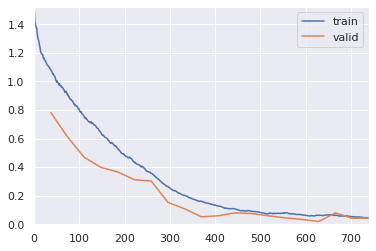

Better model found at epoch 1 with valid_loss value: 0.6107729077339172.
Better model found at epoch 2 with valid_loss value: 0.4684094786643982.
Better model found at epoch 3 with valid_loss value: 0.39810243248939514.
Better model found at epoch 4 with valid_loss value: 0.3661873936653137.
Better model found at epoch 5 with valid_loss value: 0.3115871250629425.
Better model found at epoch 6 with valid_loss value: 0.3027341961860657.
Better model found at epoch 7 with valid_loss value: 0.1530911773443222.
Better model found at epoch 8 with valid_loss value: 0.10821699351072311.
Better model found at epoch 9 with valid_loss value: 0.0526394248008728.
Better model found at epoch 14 with valid_loss value: 0.04548782855272293.
Better model found at epoch 15 with valid_loss value: 0.034194957464933395.
Better model found at epoch 16 with valid_loss value: 0.019606051966547966.


Better model found at epoch 0 with valid_loss value: 0.021753281354904175.


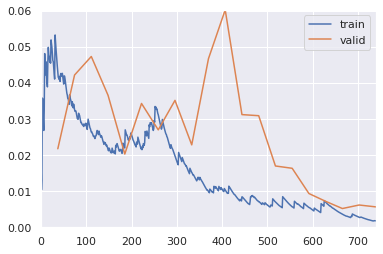

Better model found at epoch 4 with valid_loss value: 0.020289508625864983.
Better model found at epoch 13 with valid_loss value: 0.016983715817332268.
Better model found at epoch 14 with valid_loss value: 0.01634632796049118.
Better model found at epoch 15 with valid_loss value: 0.009354740381240845.
Better model found at epoch 16 with valid_loss value: 0.0071920487098395824.
Better model found at epoch 17 with valid_loss value: 0.005199912004172802.


In [ ]:
learn_pawn.fine_tune(epochs, freeze_epochs=freeze_epochs)

### Evaluation

In [ ]:
learn_pawn.load(path/'models'/'model_pawn')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


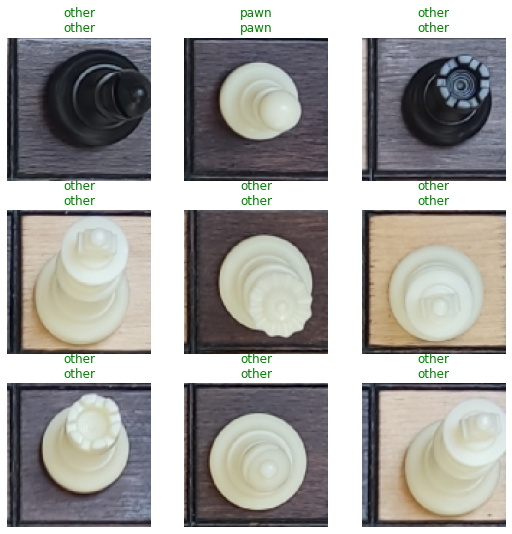

In [ ]:
learn_pawn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_pawn)
interp.print_classification_report()

              precision    recall  f1-score   support

       other       1.00      1.00      1.00       704
        pawn       1.00      0.98      0.99       128

    accuracy                           1.00       832
   macro avg       1.00      0.99      1.00       832
weighted avg       1.00      1.00      1.00       832



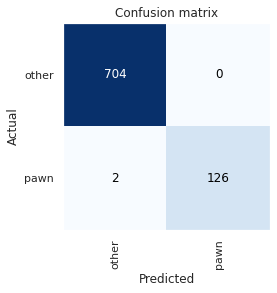

In [ ]:
interp.plot_confusion_matrix()

## Queen

### Data

In [24]:
def is_queen(x):  return is_label(x, 'queen')

In [25]:
dblock_queen = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=filter_boards,
                   splitter=GrandparentSplitter(),
                   get_y=is_queen,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms(size=100, min_scale=0.75))
dls_queen = dblock_queen.dataloaders(path/'data')

In [26]:
epochs = 20
freeze_epochs = 20
metrics = [
        error_rate,
]
callbacks = [
        ShowGraphCallback(),
        EarlyStoppingCallback(monitor='valid_loss', patience=10),
        SaveModelCallback(monitor='valid_loss', fname=path/'models'/'model_queen')
]
learn_queen = cnn_learner(dls_queen, resnet18, metrics=metrics, cbs=callbacks)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


### Training

Better model found at epoch 0 with valid_loss value: 0.658233642578125.


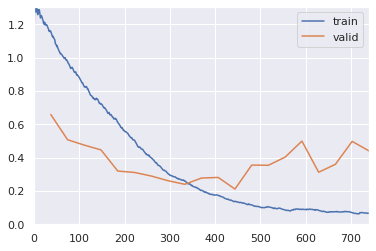

Better model found at epoch 1 with valid_loss value: 0.5071537494659424.
Better model found at epoch 2 with valid_loss value: 0.4748162627220154.
Better model found at epoch 3 with valid_loss value: 0.44600963592529297.
Better model found at epoch 4 with valid_loss value: 0.31927257776260376.
Better model found at epoch 5 with valid_loss value: 0.31084662675857544.
Better model found at epoch 6 with valid_loss value: 0.2895760238170624.
Better model found at epoch 7 with valid_loss value: 0.26141780614852905.
Better model found at epoch 8 with valid_loss value: 0.23981784284114838.
Better model found at epoch 11 with valid_loss value: 0.21138347685337067.


Better model found at epoch 0 with valid_loss value: 0.23075422644615173.


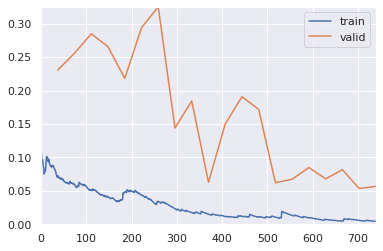

Better model found at epoch 4 with valid_loss value: 0.21816036105155945.
Better model found at epoch 7 with valid_loss value: 0.14396534860134125.
Better model found at epoch 9 with valid_loss value: 0.06274929642677307.
Better model found at epoch 13 with valid_loss value: 0.06215279921889305.
Better model found at epoch 18 with valid_loss value: 0.05353963002562523.


In [ ]:
learn_queen.fine_tune(epochs, freeze_epochs=freeze_epochs)

### Evaluation

In [ ]:
learn_queen.load(path/'models'/'model_queen')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


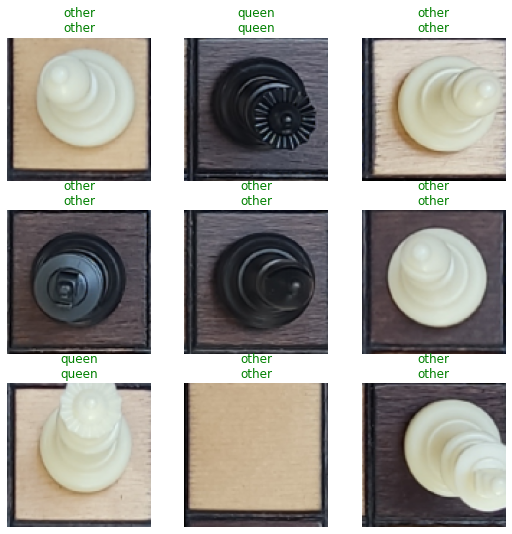

In [ ]:
learn_queen.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_queen)
interp.print_classification_report()

              precision    recall  f1-score   support

       other       0.98      1.00      0.99       704
       queen       0.98      0.88      0.93       128

    accuracy                           0.98       832
   macro avg       0.98      0.94      0.96       832
weighted avg       0.98      0.98      0.98       832



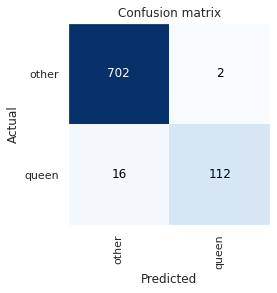

In [ ]:
interp.plot_confusion_matrix()

## Rook

### Data

In [27]:
def is_rook(x):   return is_label(x, 'rook')

In [28]:
dblock_rook = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=filter_boards,
                   splitter=GrandparentSplitter(),
                   get_y=is_rook,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms(size=100, min_scale=0.75))
dls_rook = dblock_rook.dataloaders(path/'data')

In [29]:
epochs = 20
freeze_epochs = 20
metrics = [
        error_rate,
]
callbacks = [
        ShowGraphCallback(),
        EarlyStoppingCallback(monitor='valid_loss', patience=10),
        SaveModelCallback(monitor='valid_loss', fname=path/'models'/'model_rook')
]
learn_rook = cnn_learner(dls_rook, resnet18, metrics=metrics, cbs=callbacks)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


### Training

Better model found at epoch 0 with valid_loss value: 0.7153103351593018.


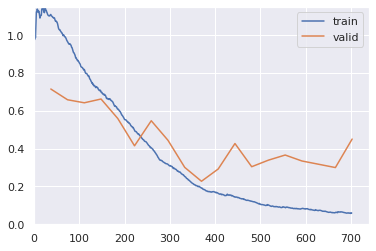

Better model found at epoch 1 with valid_loss value: 0.6584709882736206.
Better model found at epoch 2 with valid_loss value: 0.6424739360809326.
Better model found at epoch 4 with valid_loss value: 0.5594740509986877.
Better model found at epoch 5 with valid_loss value: 0.41505762934684753.
Better model found at epoch 8 with valid_loss value: 0.30089518427848816.
Better model found at epoch 9 with valid_loss value: 0.2275736927986145.
No improvement since epoch 9: early stopping


Better model found at epoch 0 with valid_loss value: 0.32701486349105835.


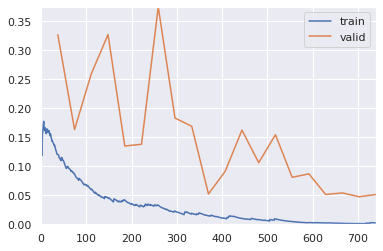

Better model found at epoch 1 with valid_loss value: 0.16346293687820435.
Better model found at epoch 4 with valid_loss value: 0.13507021963596344.
Better model found at epoch 9 with valid_loss value: 0.05231422558426857.
Better model found at epoch 16 with valid_loss value: 0.051469698548316956.
Better model found at epoch 18 with valid_loss value: 0.0475039929151535.


In [ ]:
learn_rook.fine_tune(epochs, freeze_epochs=freeze_epochs)

### Evaluation

In [ ]:
learn_rook.load(path/'models'/'model_rook')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


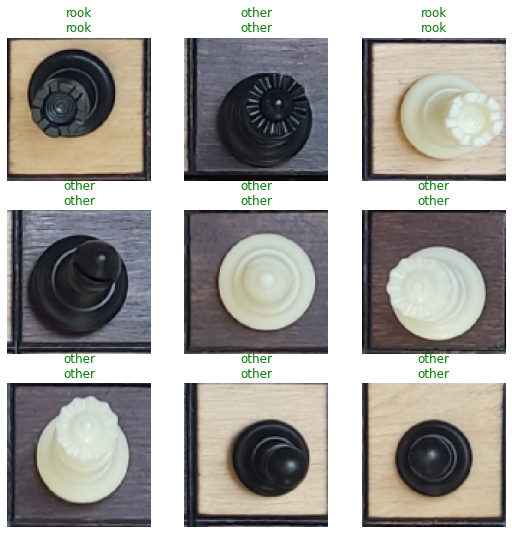

In [ ]:
learn_rook.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_rook)
interp.print_classification_report()

              precision    recall  f1-score   support

       other       0.99      0.99      0.99       704
        rook       0.94      0.95      0.94       128

    accuracy                           0.98       832
   macro avg       0.96      0.97      0.97       832
weighted avg       0.98      0.98      0.98       832



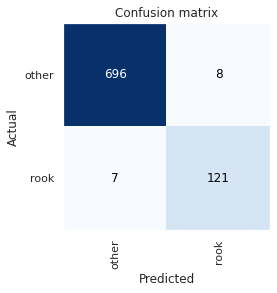

In [ ]:
interp.plot_confusion_matrix()

## Ensemble

In [30]:
import chess
import chess.svg

def half_labels(x): return x.parent.name[6:].split('\.')[0] if not 'empty' in x.__str__() else 'empty'

def fen_to_image(fen):
    board = chess.Board(fen)
    current_board = chess.svg.board(board=board)

    output_file = open('board.svg', "w")
    output_file.write(current_board)
    output_file.close()

    return board

def sigmoid(value):
    a = 10
    b = 1
    c = math.pow(value, a)
    return  c / (c + math.pow(b - b * value, a))

def generate_mask(shape):
    mask = np.ones(shape)
    width = shape[0]
    heigth = shape[1]
    channels = shape[2]

    for i in range(width):
        x = i / width * 2 - 1
        for j in range(heigth):
            y = j / heigth * 2 - 1
            value = sigmoid(max(abs(x), abs(y)))
            for k in range(channels): mask[i][j][k] -= value
    return mask

def apply_mask(img):
    mask = generate_mask(img.shape)
    return np.multiply(mask, img)

In [37]:
from PIL import Image
from sklearn.cluster import KMeans

class Model:
    def __init__(self):
        self.targets = {
            'bishop': 0,
            'king'  : 1,
            'knight': 2,
            'pawn'  : 3,
            'queen' : 4,
            'rook'  : 5,
            'empty' : 6
        }

        self.labels = [*self.targets]

    def predict(self, image):
        pass

    def predict_batch(self, images):
        conf = [ np.zeros(len(self.labels)) for _ in range(len(self.labels)) ]
        for image in images:
            target = half_labels(image)
            image = PILImage.create(image)
            pred = self.predict(image)
            conf[self.targets[target]][self.targets[pred]] += 1
        return conf

    def predict_board(self, image, color = True):
        img = PILImage.create(image)
        width = img.width/8
        height = img.height/8

        labels2fen = {
            'bishop': 'B',
            'knight': 'N',
            'king'  : 'K',
            'pawn'  : 'P',
            'rook'  : 'R',
            'queen' : 'Q',
        }

        fen = ''
        pieces = []
        positions = []
        predictions = []
        probs = []
        alternative = []

        white_kings_probs = []
        white_kings_positions = []
        white_kings_alternative = []

        black_kings_probs = []
        black_kings_positions = []
        black_kings_alternative = []

        for j in range(8):
            n_empty = 0
            for i in range(8):
                square = np.array(img.crop((width * i, height * j, width * (i + 1), height * (j + 1))))
                pred, prob, second_pred = self.predict(square)
                if pred != 'empty':
                    if n_empty != 0: 
                        fen += f'{n_empty}{labels2fen[pred]}'
                        n_empty = 0
                    else: fen += f'{labels2fen[pred]}'
                    pieces.append(square)
                    positions.append(len(fen) - 1)
                    predictions.append(pred)
                    probs.append(prob)
                    alternative.append(labels2fen[second_pred])
                else:  n_empty +=1
            
            fen += f'{n_empty if n_empty != 0 else ""}/'

        fen = list(fen)

        if color:
            pieces = np.array([apply_mask(piece).mean() for piece in pieces])
            km = KMeans(n_clusters=2, init= np.array([[0], [255]]), max_iter=1000)
            km.fit(pieces.reshape(-1,1))

            black_cluster = km.cluster_centers_[0][0]
            white_cluster = km.cluster_centers_[1][0]

            
            for idx, piece in enumerate(pieces):
                if abs(black_cluster - piece) < abs(white_cluster - piece): 
                    fen[positions[idx]] = fen[positions[idx]].lower()
                    if predictions[idx] == 'king':
                        black_kings_positions.append(positions[idx])
                        black_kings_probs.append(probs[idx])
                        black_kings_alternative.append(alternative[idx])
                elif predictions[idx] == 'king':
                        white_kings_positions.append(positions[idx])
                        white_kings_probs.append(probs[idx])
                        white_kings_alternative.append(alternative[idx])

            true_king = np.array(white_kings_probs).argmax()
            kings_positions = white_kings_positions[:true_king] + white_kings_positions[true_king + 1:]
            kings_alternative = white_kings_alternative[:true_king] + white_kings_alternative[true_king + 1:]
            for idx, position in enumerate(kings_positions): fen[position] = kings_alternative[idx]


            true_king = np.array(black_kings_probs).argmax()
            kings_positions = black_kings_positions[:true_king] + black_kings_positions[true_king + 1:]
            kings_alternative = black_kings_alternative[:true_king] + black_kings_alternative[true_king + 1:]
            for idx, position in enumerate(kings_positions): fen[position] = kings_alternative[idx].lower()
        
        fen = ''.join(fen)
        return fen_to_image(fen[:-1])


class TwelveLabels(Model):
    def __init__(self):
        super().__init__()
        self.model = learn12.load(path/'models'/'model12')
        self.labels = [
            'black_bishop',
            'black_king',
            'black_knight',
            'black_pawn',
            'black_queen',
            'black_rook',
            'empty',
            'white_bishop',
            'white_king',
            'white_knight',
            'white_pawn',
            'white_queen',
            'white_rook'
        ]
        
    def predict(self, image):
        pred, index, probs = self.model.predict(image)
        
        prob = probs[index]
        probs[index] = 0
        second_pred = probs.argmax()
        while self.labels[second_pred].endswith('king'):
            probs[second_pred] = 0
            second_pred = probs.argmax()

        return pred, prob, self.labels[second_pred]

    def predict_board(self, image):
        img = PILImage.create(image)
        width = img.width/8
        height = img.height/8

        labels2fen = {
            'white_bishop': 'B',
            'white_knight': 'N',
            'white_king'  : 'K',
            'white_pawn'  : 'P',
            'white_rook'  : 'R',
            'white_queen' : 'Q',
            'black_bishop': 'b',
            'black_knight': 'n',
            'black_king'  : 'k',
            'black_pawn'  : 'p',
            'black_rook'  : 'r',
            'black_queen' : 'q'
        }

        white_kings_probs = []
        white_kings_positions = []
        white_kings_alternative = []

        black_kings_probs = []
        black_kings_positions = []
        black_kings_alternative = []


        fen = ''
        for j in range(8):
            n_empty = 0
            for i in range(8):
                square = np.array(img.crop((width * i, height * j, width * (i + 1), height * (j + 1))))
                pred, prob, alternative = self.predict(square)
                if pred != 'empty':
                    if n_empty != 0: 
                        fen += f'{n_empty}{labels2fen[pred]}'
                        n_empty = 0
                    else: fen += f'{labels2fen[pred]}'
                    if pred == 'white_king':
                        white_kings_probs.append(prob)
                        white_kings_positions.append(len(fen) - 1)
                        white_kings_alternative.append(labels2fen[alternative])
                    elif pred == 'black_king':
                        black_kings_probs.append(prob)
                        black_kings_positions.append(len(fen) - 1)
                        black_kings_alternative.append(labels2fen[alternative])
                        
                else:  n_empty +=1
            
            fen += f'{n_empty if n_empty != 0 else ""}/'

        fen = list(fen)

        true_king = np.array(white_kings_probs).argmax()
        kings_positions = white_kings_positions[:true_king] + white_kings_positions[true_king + 1:]
        kings_alternative = white_kings_alternative[:true_king] + white_kings_alternative[true_king + 1:]
        for idx, position in enumerate(kings_positions): fen[position] = kings_alternative[idx]


        true_king = np.array(black_kings_probs).argmax()
        kings_positions = black_kings_positions[:true_king] + black_kings_positions[true_king + 1:]
        kings_alternative = black_kings_alternative[:true_king] + black_kings_alternative[true_king + 1:]
        for idx, position in enumerate(kings_positions): fen[position] = kings_alternative[idx].lower()

        fen = ''.join(fen)

        return fen_to_image(fen[:-1])    


class SixLabels(Model):
    def __init__(self):
        super().__init__()
        self.model = learn6.load(path/'models'/'model6')
        
    def predict(self, image):
        target, index, probs = self.model.predict(image)
        return target


class Ensemble(Model):
    def __init__(self):
        super().__init__()

        self.models = [
            learn_bishop.load(path/'models'/'model_bishop'),
            learn_king.load(path/'models'/'model_king'),
            learn_knight.load(path/'models'/'model_knight'),
            learn_pawn.load(path/'models'/'model_pawn'),
            learn_queen.load(path/'models'/'model_queen'),
            learn_rook.load(path/'models'/'model_rook'),
            learn_empty.load(path/'models'/'model_empty'),
        ]

    def predict(self, image):
        probs = np.zeros(len(self.labels))
        
        for index, model in enumerate(self.models):
            pred_data = model.predict(image)
            probs[index] =  pred_data[2].max() if pred_data[0] != 'other' else pred_data[2].min()
    
        pred = probs.argmax()
        prob = probs.max()
        probs[pred] = 0
        second_pred = probs.argmax()
        return self.labels[pred], prob, self.labels[second_pred]

In [ ]:
model = Ensemble()
conf = model.predict_batch(get_image_files(path/'data'/'valid'))

Output hidden; open in https://colab.research.google.com to view.

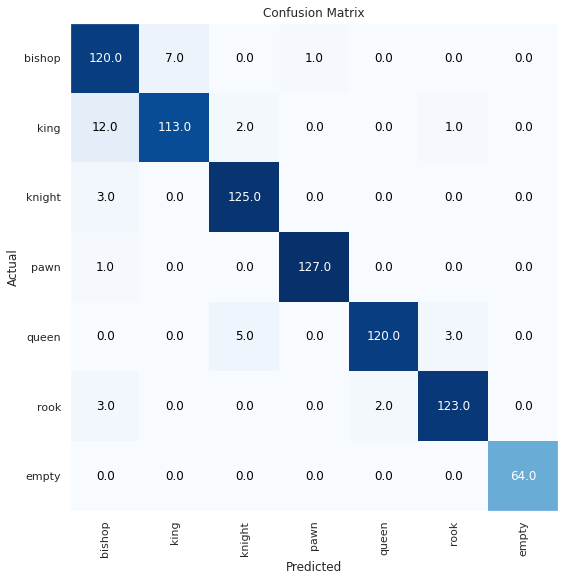

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,8))
plt.imshow(conf, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')

tick_marks = np.arange(len(model.labels))
plt.xticks(tick_marks, model.labels, rotation=90)
plt.yticks(tick_marks, model.labels, rotation=0)

max = 0
for list in conf:
  list_max = list.max()
  if list_max > max : max = list_max

thresh = max/2.
for i in range(len(model.labels)):
  for j in range(len(model.labels)):
    coeff = f'{conf[i][j]}'
    plt.text(j, i, coeff, horizontalalignment="center", verticalalignment="center", color="white" if conf[i][j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.grid(False)
plt.show()

In [ ]:
for label in model.labels:
  index = model.targets[label]
  tp_fp = 0
  for i in range(len(model.labels)): tp_fp += conf[i][index]

  precission = round(float(conf[index][index]) / float(tp_fp),2)
  recall = round(float(conf[index][index]) / float(conf[index].sum()),2)
  f1_score = round(2*(precission*recall)/(precission+recall),2)

  print(f'{label}: {precission},{recall},{f1_score}')

bishop: 0.86,0.94,0.9
king: 0.94,0.88,0.91
knight: 0.95,0.98,0.96
pawn: 0.99,0.99,0.99
queen: 0.98,0.94,0.96
rook: 0.97,0.96,0.96
empty: 1.0,1.0,1.0


# Board Recreation

In [33]:
board = PILImage.create(path/'board'/'board.png')
board

Output hidden; open in https://colab.research.google.com to view.

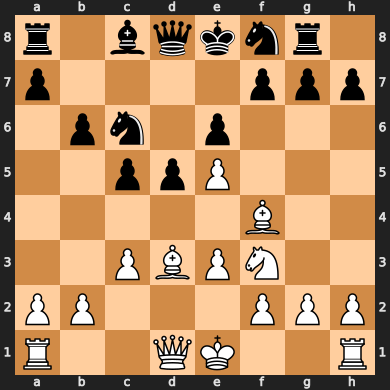

In [ ]:
fen = 'r1bqknr1/p4ppp/1pn1p3/2ppP3/5B2/2PBPN2/PP3PPP/R2QK2R'
fen_to_image(fen)

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


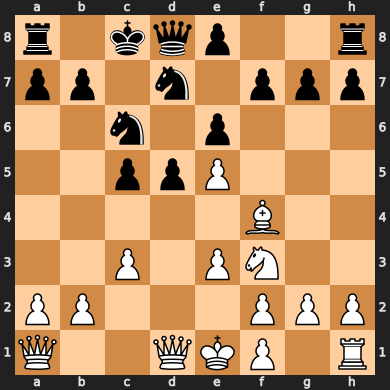

In [38]:
model = TwelveLabels()
model.predict_board(path/'board'/'board.png')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


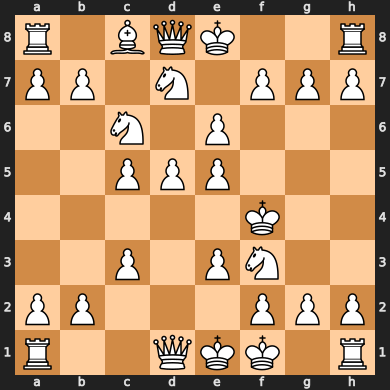

In [39]:
model = Ensemble()
model.predict_board(path/'board'/'board.png', color = False)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


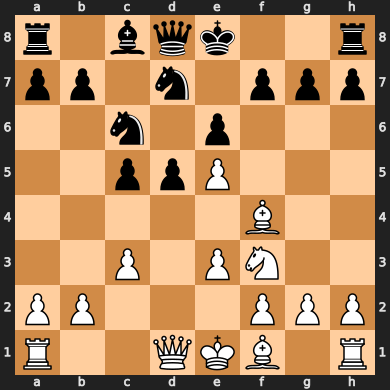

In [40]:
model.predict_board(path/'board'/'board.png')

# Results

In [5]:
df_12  = pd.read_csv(f'{path}/data/12_labels.csv')
df_6   = pd.read_csv(f'{path}/data/6_labels.csv')
df_ova = pd.read_csv(f'{path}/data/one_vs_all.csv')

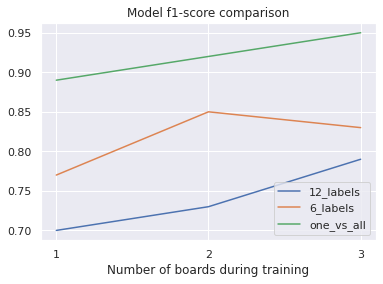

In [6]:
data   = [df_12, df_6, df_ova]
labels = ['12_labels', '6_labels', 'one_vs_all']
metric = 'f1-score'
x = np.arange(1,4)

for df in data: plt.plot(x, df[df['metric']==metric]['weighted_avg'])

plt.xticks(x)
plt.title(f'Model {metric} comparison')
plt.xlabel('Number of boards during training')
plt.legend(labels=labels)
plt.show()

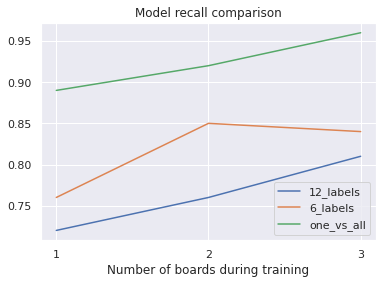

In [10]:
data   = [df_12, df_6, df_ova]
labels = ['12_labels', '6_labels', 'one_vs_all']
metric = 'recall'
x = np.arange(1,4)

for df in data: plt.plot(x, df[df['metric']==metric]['weighted_avg'])

plt.xticks(x)
plt.title(f'Model {metric} comparison')
plt.xlabel('Number of boards during training')
plt.legend(labels=labels)
plt.show()

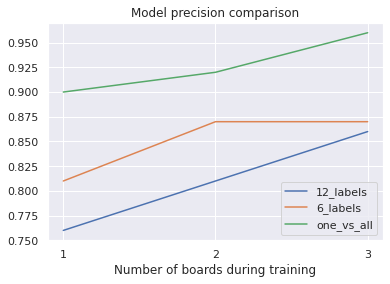

In [12]:
data   = [df_12, df_6, df_ova]
labels = ['12_labels', '6_labels', 'one_vs_all']
metric = 'precision'
x = np.arange(1,4)

for df in data: plt.plot(x, df[df['metric']==metric]['weighted_avg'])

plt.xticks(x)
plt.title(f'Model {metric} comparison')
plt.xlabel('Number of boards during training')
plt.legend(labels=labels)
plt.show()

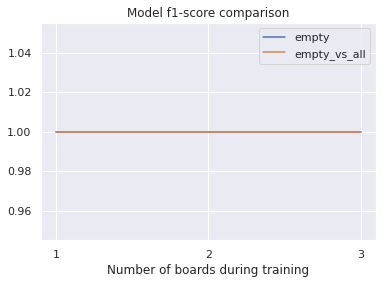

In [ ]:
x = np.arange(1,4)
metrics =  ['precision', 'recall', 'f1-score']
metric = metrics[2]
label  = 'empty'
labels = [label, f'{label}_vs_all']

plt.plot(x, df_ova[df['metric']==metric][label])
plt.plot(x, df_ova[df['metric']==metric][f'{label}_vs_all'])

plt.xticks(x)
plt.title(f'Model {metric} comparison')
plt.xlabel('Number of boards during training')
plt.legend(labels=labels)
plt.show()